## Problem Statement
We have  dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset.

### The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## This dataset is present in the datasets module of sklearn (scikit-learn) library. We can import this dataset as follows.

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\suyashi144893\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

### Insights: We can conclude from the above description that we have 13 independent variable and one dependent (House price) variable. Now we need to check for a correlation between independent and dependent variable. We can use scatterplot/corrplot for this. 

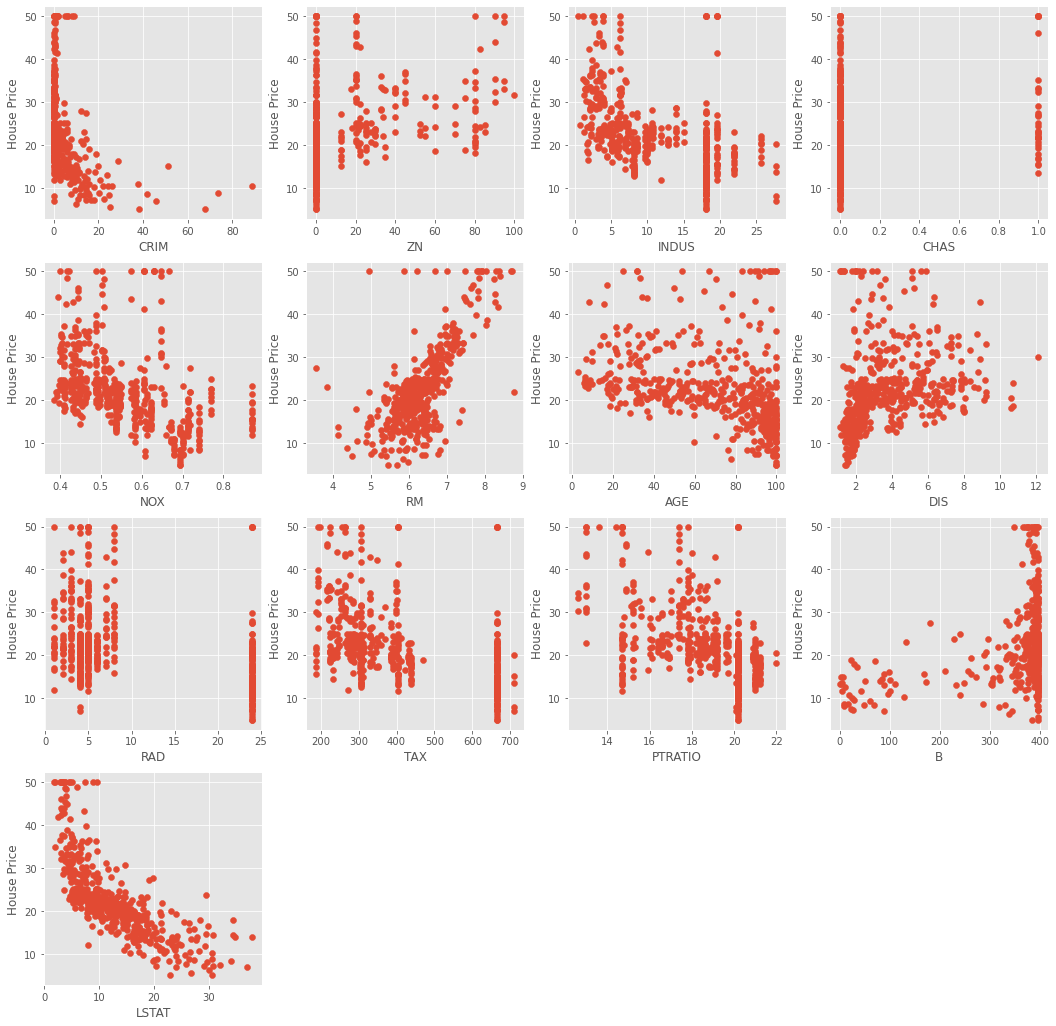

In [4]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)

plt.show()


## We can observe from the above scatter plots that some of the independent variables are not very much correlated (either positively or negatively) with the target variable. These variables will get their coefficients to be reduced in regularization. 


- The correlation matrix can also  be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

## Data Processing 

In [14]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

import pandas as pd
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


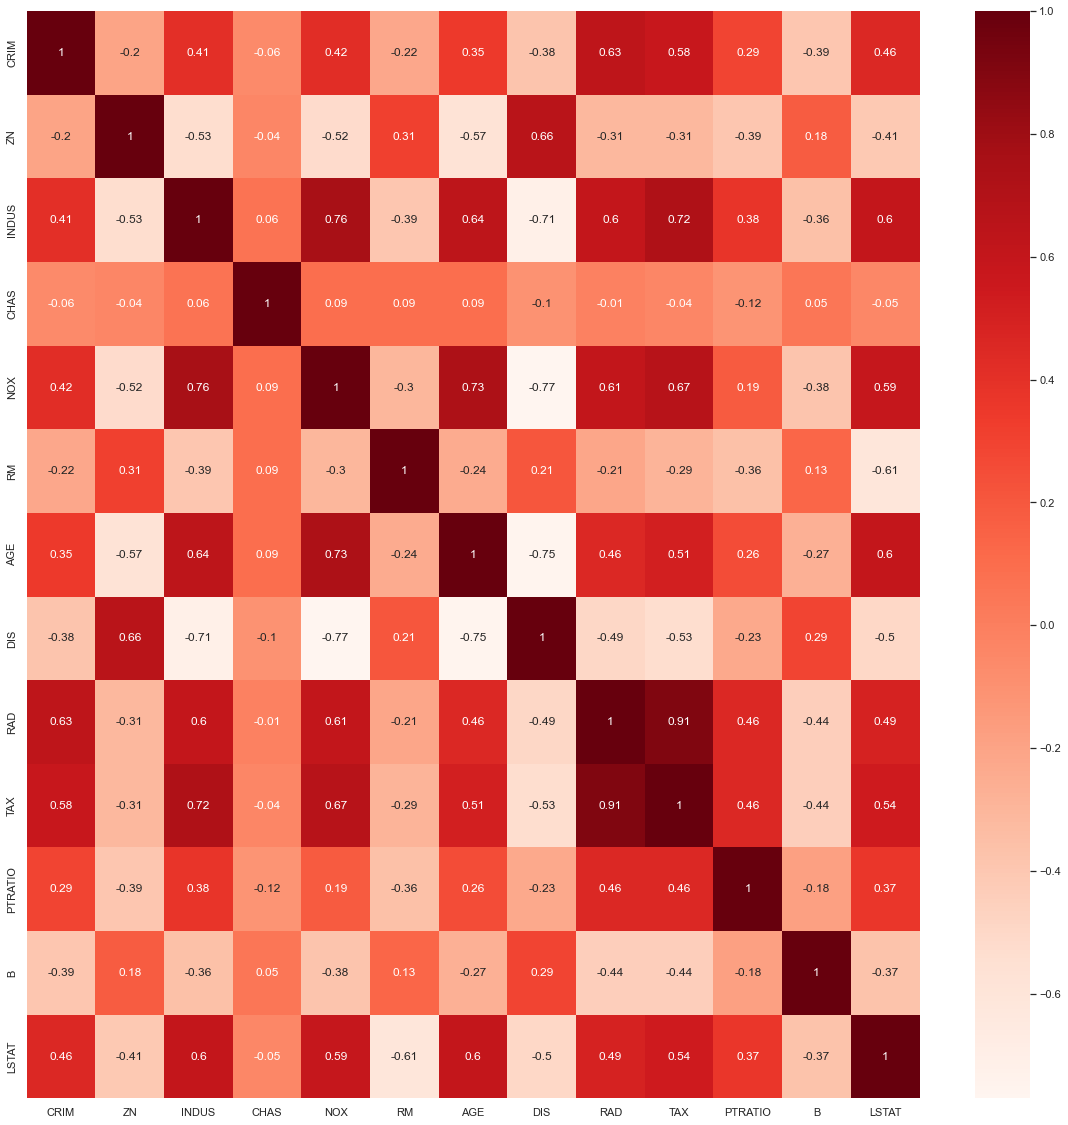

In [15]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(20,20))
cor = boston.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Let us apply train-test split to divide the dataset into two parts, one for training and another for testing. We will be using 25% of the data for testing

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [20]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  20.869292183770717
    Columns  Coefficient Estimate
0      CRIM             -0.130800
1        ZN              0.049403
2     INDUS              0.001095
3      CHAS              2.705366
4       NOX            -15.957050
5        RM              3.413973
6       AGE              0.001119
7       DIS             -1.493081
8       RAD              0.364422
9       TAX             -0.013172
10  PTRATIO             -0.952370
11        B              0.011749
12    LSTAT             -0.594076


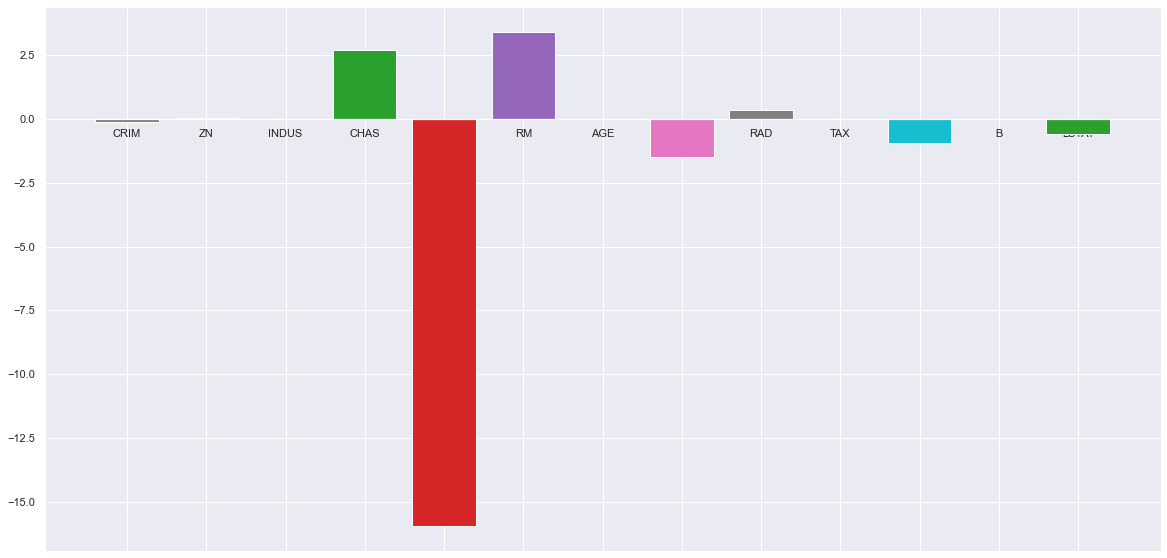

In [21]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


- As we can observe that lots of the variables have an insignificant coefficient, these coefficients did not contribute to the model very much and need to regulate or even eliminate some of these variables. 

## Ridge Regression

- In Ridge regression, we add a penalty term which is equal to the square of the coefficient. 
- The L2 term is equal to the square of the magnitude of the coefficients.
- We also add a coefficient lambda  to control that penalty term. 
- In this case if  lambda  is zero then the equation is the basic OLS 
- else if lambda is > , 0 then it will add a constraint to the coefficient. 
- As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. 
- This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.


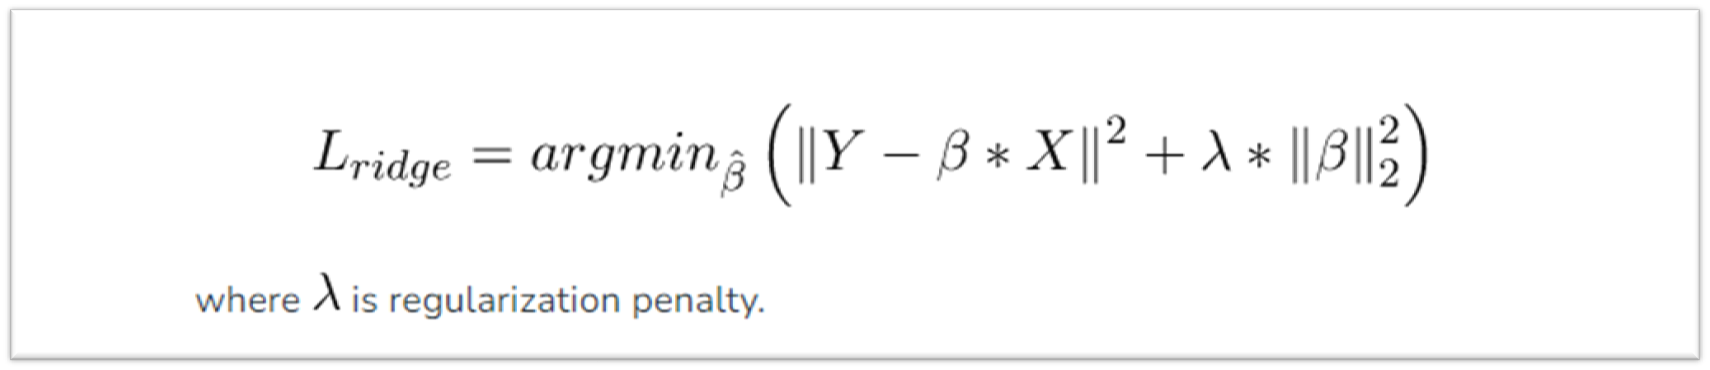



### Limitation of Ridge Regression: 
Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.



## Code Implementation for Ridge Regression:
Ridge Regression added a term in ordinary least square error function that regularizes the value of coefficients of variables. This term is the sum of squares of coefficient multiplied by the parameter The motive of adding this term is to penalize the variable corresponding to that coefficient not very much correlated to the target variable. This term is called L2 regularization. 

In [22]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


21.599270335618908
    Columns  Coefficient Estimate
0      CRIM             -0.128119
1        ZN              0.051134
2     INDUS             -0.029698
3      CHAS              2.489514
4       NOX             -8.481877
5        RM              3.425398
6       AGE             -0.004023
7       DIS             -1.379958
8       RAD              0.349348
9       TAX             -0.013913
10  PTRATIO             -0.879583
11        B              0.011988
12    LSTAT             -0.608894


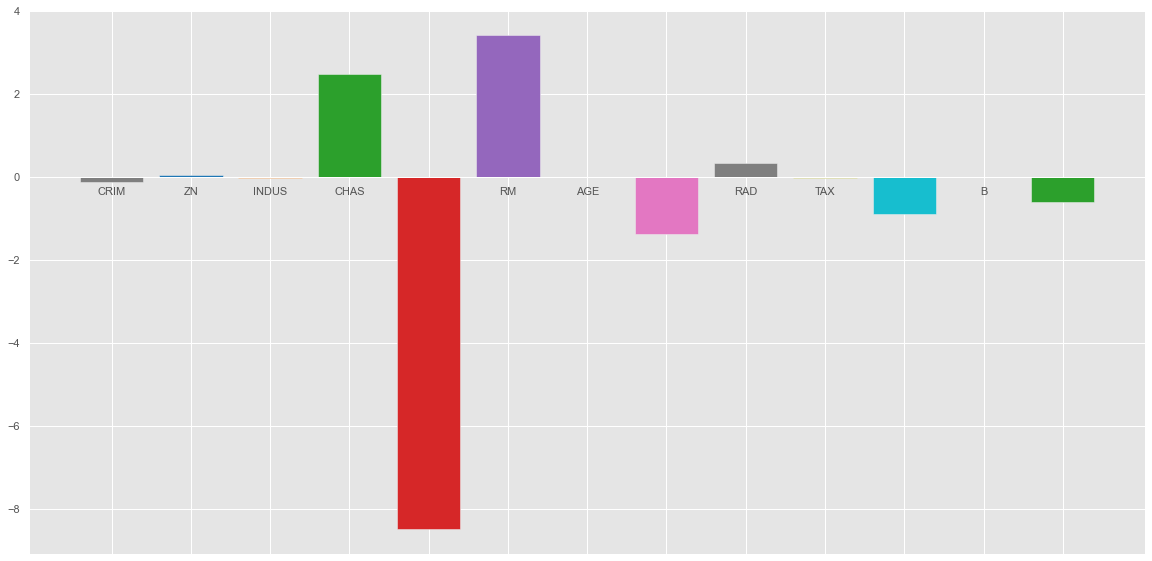

In [24]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


## In the above graph we take alpha = 1. 

## Let’s look at another bar plot with alpha = 10 

In [27]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 10)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


23.008703526611324
    Columns  Coefficient Estimate
0      CRIM             -0.125807
1        ZN              0.053963
2     INDUS             -0.054299
3      CHAS              1.764548
4       NOX             -1.602265
5        RM              3.206627
6       AGE             -0.006393
7       DIS             -1.270874
8       RAD              0.345017
9       TAX             -0.015059
10  PTRATIO             -0.830572
11        B              0.012050
12    LSTAT             -0.640126


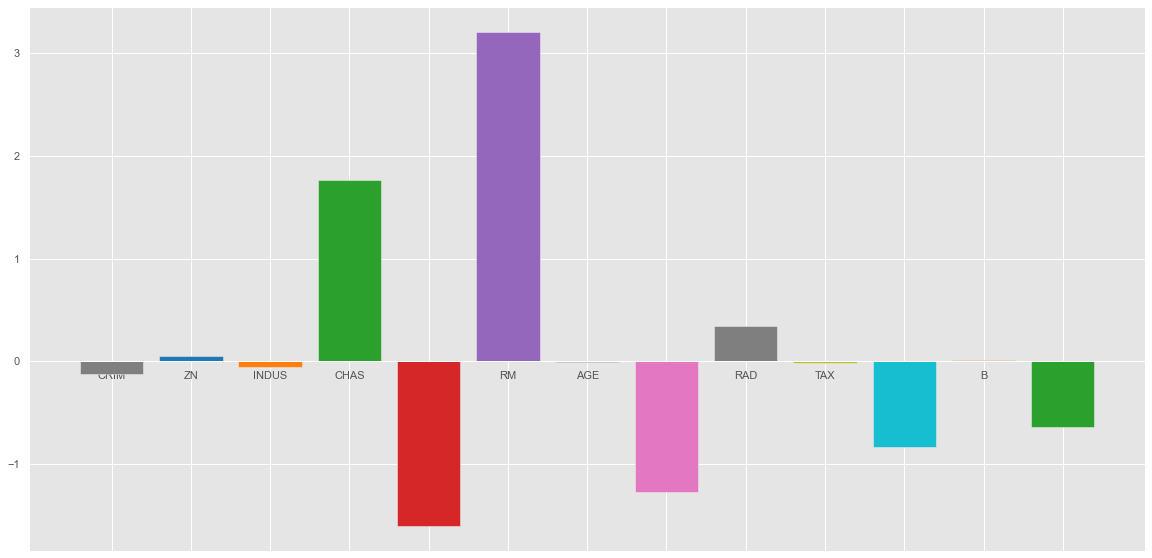

In [28]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


- As we can observe from the above plots that **alpha helps in regularizing the coefficient and make them converge faster**. 
- Notice that the above graphs can be misleading in a way that it shows some of the coefficients become zero. 
## In Ridge Regularization, the coefficients can never be 0, they are just too small to observe in above plots. 

## Lasso Regression: 

- Lasso regression stands for **Least Absolute Shrinkage and Selection Operator**
- It adds penalty term to the cost function. This term is the absolute sum of the coefficients. 
- As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. 
- The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.


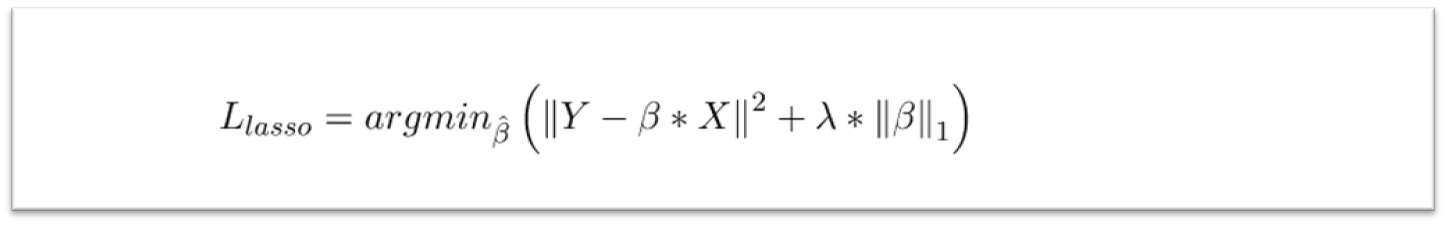

### Lasso Regression is similar to Ridge regression except here we add Mean Absolute value of coefficients in place of mean square value. Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0. The new term we added to Ordinary Least Square(OLS) is called L1 Regularization.


## Implementation of  Lasso using Python

In [29]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Mean squared error on test set 29.355825654837467
    Columns  Coefficient Estimate
0      CRIM             -0.079618
1        ZN              0.055730
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.446538
6       AGE              0.024933
7       DIS             -0.660145
8       RAD              0.317057
9       TAX             -0.015444
10  PTRATIO             -0.794276
11        B              0.009014
12    LSTAT             -0.834208


### Limitation of Lasso Regression:
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

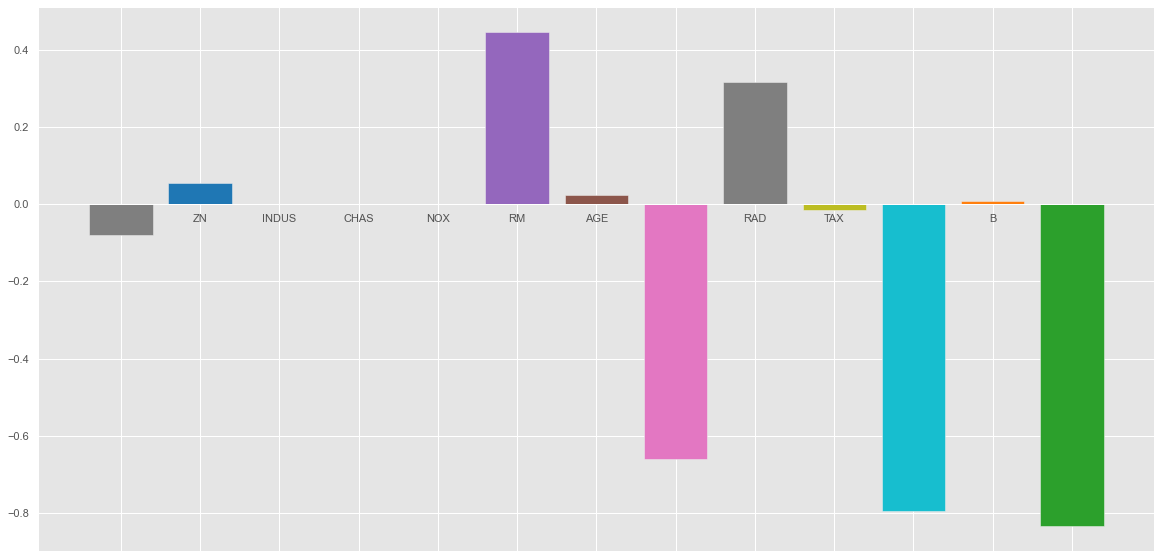

In [30]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


## Elastic Net :
In elastic Net Regularization we added the both terms of L1 and L2 to get the final loss function. This leads us to reduce the following loss function
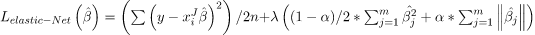

In [31]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 28.430295153299944


,Columns,Coefficient Estimate
0,CRIM,-0.095965
1,ZN,0.058453
2,INDUS,-0.004655
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.769578
6,AGE,0.022338
7,DIS,-0.747992
8,RAD,0.347977
9,TAX,-0.016647


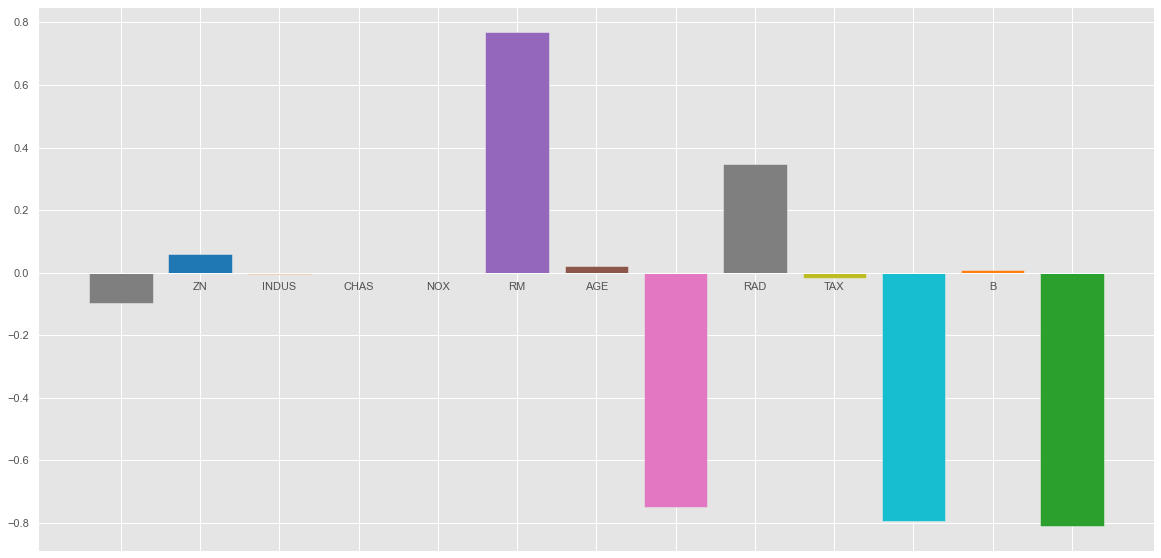

In [32]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff["Columns"] ,
e_net_coeff['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


### Conclusion 

- **Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.** 
 
- **Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables**
 
- **Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection** 

- **Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.**